# Data Analysis


This file allows the data analysis of the CMA-ES optimizations.

First, we will start with the importation and extraction of data from the optimizations performed on the cluster. 

In [1]:
# Imports
from wNMF import wNMF
import numpy as np
import matplotlib.pyplot as plt   # allows to plot charts
import pandas as pd              
import seaborn as sns    # python data visualization library based on matplotlib
import glob
import os 

sns.set(style="darkgrid")

After the various importations, we open the different files containing the results of the optimizations with CMA-ES, for all the generations. Then, data formatting of the dataframe is necessary as the .out files have a specific format. We also define the name of each columns (generation, evals for evaluations, sigma, distance, average, std for the standard deviation, min and max for the minimum and maximum of the reward function and the duration). Finally, a casting from val to float/int is necessary to be able to plot the data of the dataframes. 

In [2]:
def print_results(results):
    for line in results:
        print()
        for col in line:
            print(col, end='\t')

# path = ''/home/efx/Desktop/osimrl_biorob/reflex_optResults'
#for filename in glob.glob(os.path.join(path, '*.txt')):
#    with open(os.path.join(os.getcwd(), filename), 'r') as f: # open in readonly mode

f = open('/home/efx/Desktop/osimrl_biorob/reflex_optResults/slurm-292.out','r')  
#f = open('/home/efx/Desktop/osimrl_biorob/reflex_optResults/slurm-224.out','r')  
#f = open('/home/efx/Desktop/osimrl_biorob/reflex_optResults/slurm-227.out','r') 

# Data formatting 
fileContent = f.read()
fileContent = fileContent.split("\n")[1:]
results = []

for line in fileContent:
    line = line.replace(" ", "")
    line = line.split('\t')
    line[0] = line[0].split('/')[0]
    results.append(line)
    
# Define the name of each columns of the dataframe
df = pd.DataFrame(results, columns=['generation', 'evals', 'sigma', 'distance', 'average', 'std', 'min', 'max', 'duration'])
df = df[:-1] # Remove last line of Nonetype

# Cast val to float
df['generation'] = df['generation'].astype(int)
df['evals'] = df['evals'].astype(int)
df['sigma'] = df['sigma'].astype(float)
df['distance'] = df['distance'].astype(float)
df['average'] = df['average'].astype(float)
df['std'] = df['std'].astype(float)
df['min'] = df['min'].astype(float)
df['max'] = df['max'].astype(float)
df['duration'] = df['duration'].astype(float)

# Table of the data
print(df)
df.head()

     generation  evals  sigma  distance  average    std    min     max  \
0             1     39   0.48     11.15    66.38  66.63   6.32  186.60   
1             2     39   0.46     11.80   113.59  74.16   6.63  186.58   
2             3     39   0.44     12.54   126.63  70.77  14.63  186.01   
3             4     39   0.44     11.53    84.84  70.43  15.39  185.75   
4             5     39   0.43     11.15   109.79  71.87  15.06  185.68   
..          ...    ...    ...       ...      ...    ...    ...     ...   
145         146     39   0.07     11.60   156.52  56.81  35.75  189.51   
146         147     39   0.07     11.74   156.10  57.53  28.01  189.49   
147         148     39   0.07     11.82   146.87  59.40  36.74  189.63   
148         149     39   0.07     11.91   154.00  57.88  23.29  189.42   
149         150     39   0.07     12.03   160.13  50.43  41.98  189.23   

     duration  
0        10.0  
1        10.0  
2        10.0  
3        10.0  
4        10.0  
..        ...  

,generation,evals,sigma,distance,average,std,min,max,duration
0,1,39,0.48,11.15,66.38,66.63,6.32,186.60,10.0
1,2,39,0.46,11.80,113.59,74.16,6.63,186.58,10.0
2,3,39,0.44,12.54,126.63,70.77,14.63,186.01,10.0
3,4,39,0.44,11.53,84.84,70.43,15.39,185.75,10.0
4,5,39,0.43,11.15,109.79,71.87,15.06,185.68,10.0


From the different tables, we will plot the data. First, we plot the fitness/reward function as a function of the number of generation and then we plot the duration of the walking human model with respect to the number of generation.

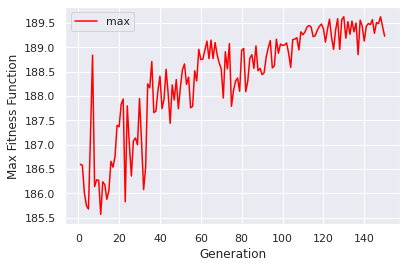

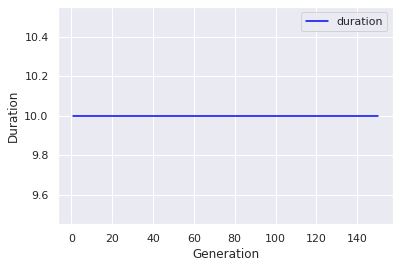

In [3]:
# Graph of the fitness function depending on the number of generation
df.plot(kind='line',x='generation',y='max',color='red')
plt.xlabel('Generation')
plt.ylabel('Max Fitness Function')
plt.show()

# Graph of the duration of the walking human model wrt the number of generation
df.plot(kind='line', x='generation', y='duration', color='blue')
plt.xlabel('Generation')
plt.ylabel('Duration')
plt.show()

From this, we decide to compare the best results from the optimisations and to do so, we first format the data before plotting multiple optimisations at once, specifically the fitness function with respect to the number of generations. 

     generation  evals  sigma  distance  average    std    min     max  \
0             1     39   0.39     12.49    69.51  64.63   6.41  186.22   
1             2     39   0.38     12.67   101.45  75.26  14.03  187.00   
2             3     39   0.37     12.70   105.70  73.81  15.66  186.14   
3             4     39   0.36     12.83   111.80  73.69  14.72  186.96   
4             5     39   0.35     11.80    89.47  69.70  14.22  185.60   
..          ...    ...    ...       ...      ...    ...    ...     ...   
145         146     39   0.07     12.75   169.67  40.21  60.07  189.06   
146         147     39   0.07     12.58   171.22  38.93  41.39  188.99   
147         148     39   0.07     12.66   177.51  29.55  79.54  189.14   
148         149     39   0.07     12.27   178.20  30.39  37.05  188.90   
149         150     39   0.07     12.69   168.87  44.76  38.99  188.92   

     duration  
0        10.0  
1        10.0  
2        10.0  
3        10.0  
4        10.0  
..        ...  

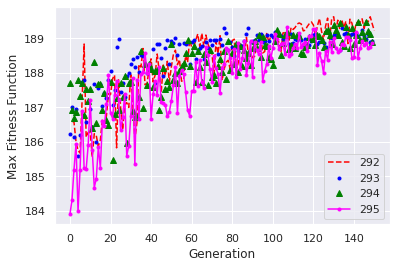

In [5]:
# Compare multiple optimisations to the fitness function and the duration wrt the number of generation
g = open('/home/efx/Desktop/osimrl_biorob/reflex_optResults/slurm-293.out','r')  
h = open('/home/efx/Desktop/osimrl_biorob/reflex_optResults/slurm-294.out','r')  
i = open('/home/efx/Desktop/osimrl_biorob/reflex_optResults/slurm-295.out','r') 

fileContent2 = g.read()
fileContent3 = h.read()
fileContent4 = i.read()

fileContent2 = fileContent2.split("\n")[1:]
fileContent3 = fileContent3.split("\n")[1:]
fileContent4 = fileContent4.split("\n")[1:]

results2 = []
results3 = []
results4 = []

for line in fileContent2:
    line = line.replace(" ", "")
    line = line.split('\t')
    line[0] = line[0].split('/')[0]
    results2.append(line)
    
for line in fileContent3:
    line = line.replace(" ", "")
    line = line.split('\t')
    line[0] = line[0].split('/')[0]
    results3.append(line)

for line in fileContent4:
    line = line.replace(" ", "")
    line = line.split('\t')
    line[0] = line[0].split('/')[0]
    results4.append(line)

# Define the name of each columns of the dataframe
dg = pd.DataFrame(results2, columns=['generation', 'evals', 'sigma', 'distance', 'average', 'std', 'min', 'max', 'duration'])
dg = dg[:-1] # Remove last line of Nonetype

# Cast val to float
dg['generation'] = dg['generation'].astype(int)
dg['evals'] = dg['evals'].astype(int)
dg['sigma'] = dg['sigma'].astype(float)
dg['distance'] = dg['distance'].astype(float)
dg['average'] = dg['average'].astype(float)
dg['std'] = dg['std'].astype(float)
dg['min'] = dg['min'].astype(float)
dg['max'] = dg['max'].astype(float)
dg['duration'] = dg['duration'].astype(float)

# Table of the data
print(dg)
dg.head()

# Define the name of each columns of the dataframe
dh = pd.DataFrame(results3, columns=['generation', 'evals', 'sigma', 'distance', 'average', 'std', 'min', 'max', 'duration'])
dh = dh[:-1] # Remove last line of Nonetype

# Cast val to float
dh['generation'] = dh['generation'].astype(int)
dh['evals'] = dh['evals'].astype(int)
dh['sigma'] = dh['sigma'].astype(float)
dh['distance'] = dh['distance'].astype(float)
dh['average'] = dh['average'].astype(float)
dh['std'] = dh['std'].astype(float)
dh['min'] = dh['min'].astype(float)
dh['max'] = dh['max'].astype(float)
dh['duration'] = dh['duration'].astype(float)

# Table of the data
print(dh)
dh.head()

# Define the name of each columns of the dataframe
di = pd.DataFrame(results4, columns=['generation', 'evals', 'sigma', 'distance', 'average', 'std', 'min', 'max', 'duration'])
di = di[:-1] # Remove last line of Nonetype

# Cast val to float
di['generation'] = di['generation'].astype(int)
di['evals'] = di['evals'].astype(int)
di['sigma'] = di['sigma'].astype(float)
di['distance'] = di['distance'].astype(float)
di['average'] = di['average'].astype(float)
di['std'] = di['std'].astype(float)
di['min'] = di['min'].astype(float)
di['max'] = di['max'].astype(float)
di['duration'] = di['duration'].astype(float)

# Table of the data
print(di)
di.head()

# Graph of the maximum reward function of the walking human model wrt the number of generation
af = df.plot(kind='line', x='generation', y='max', color='red', style='--', label='292')
dg.plot(kind='line', ax = af, y='max', color='blue', style='.', label='293')
dh.plot(kind='line', ax = af, y='max', color='green', style='^', label='294')
di.plot(kind='line', ax = af, y='max', color='magenta', style='.-', label='295')
plt.xlabel('Generation')
plt.ylabel('Max Fitness Function')
plt.show()

Then, we plot the graph of the duration of the walking model as a function of the number of generations. 

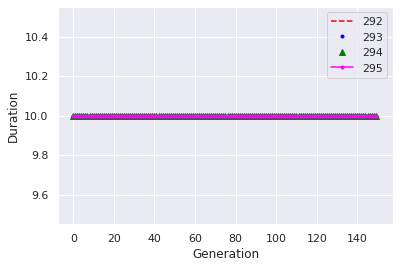

In [6]:
# Graph of the duration of the walking human model wrt the number of generation
af = df.plot(kind='line', x='generation', y='duration', color='red', style='--', label='292')
dg.plot(kind='line', ax = af, y='duration', color='blue', style='.', label='293')
dh.plot(kind='line', ax = af, y='duration', color='green', style='^', label='294')
di.plot(kind='line', ax = af, y='duration', color='magenta', style='.-', label='295')
plt.xlabel('Generation')
plt.ylabel('Duration')
plt.show()

In [7]:
# NOT NECESSARY ANYMORE ? 
# Muscle activations analysis
#from wNMF import wNMF
#import numpy as np
#import pickle

#fct = open('/home/efx/Desktop/osimrl_biorob/Checkpoints/slurm224=slurm207/checkpoint-2D-CMAES_149.pkl','rb')
#checkpoint = pickle.load(fct)
#print(checkpoint)
#for key, value in checkpoint.items():
#    print(f"{key}  {value}")




### Gait Analysis

To analyze the gait, we need to extract different informations from the optimizations:
- average step length 
- average step duration
- average duration of the swing phase
- average duration of the stance phase


The average step length corresponds to the distance divided by the number of steps, whereas the average step duration is the duration divided by the number of steps. 

In [14]:
# Average step length

# NEED TO DETERMINE THE NUMBER OF STEPS DEPENDING ON THE OPTIMISATION. TBD 

# df['StepLength'] = df['distance']/df['number of steps ']    
# df.head()


# Average step duration

# df['StepDuration'] = df['duration']/df['number of steps']